In [16]:
import numpy as np
import nibabel as nib
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

mask = nib.load('./data/sub-01_ses-movie_func_sub-01_ses-movie_task-movie_run-1_defacemask.nii').get_data()
func_data = nib.load('./data/sub-01_ses-movie_func_sub-01_ses-movie_task-movie_run-1_bold.nii').get_data()

# Ensure that the mask is boolean
mask = mask.astype(bool)
# Apply the mask, X = timeseries * voxels
X = func_data[mask].T
X1 = pca.fit_transform(X)

print(X.shape)
print(X1.shape)

(451, 218140)
(451, 2)


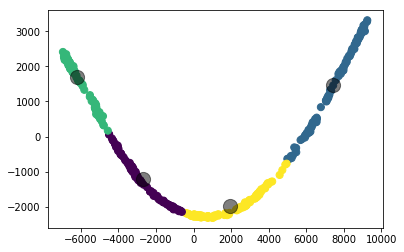

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)

plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);